📦 MyPackage loaded successfully!
🎯 Ready for complete spectral analysis workflow
📂 Data directory: /home/yuhong/UPLC_Data/081825/ontarget
📏 X-axis range: 5.0 to 10.5
⚙️  Parameters configured!
🚀 Starting Complete Analysis Workflow...
🚀============================================================
    COMPLETE SPECTRAL ANALYSIS WORKFLOW
============================================================🚀
📂 Input directory: /home/yuhong/UPLC_Data/081825/ontarget
📁 Found 7 .txt files to process

📈 Step 1: Baseline Correction
----------------------------------------
🤖======================================================================
    BASELINECORRECTOR BATCH PROCESSING
======================================================================🤖
🤖 BaselineCorrector v1.0.0 initialized
📂 Directory: /home/yuhong/UPLC_Data/081825/ontarget
🔍 Pattern: *.txt
📁 Found 7 files to process
✂️  Trimming range: X = 5.000 to 10.500

[1/7] ==================================================

📁 Processing: 073125-F0

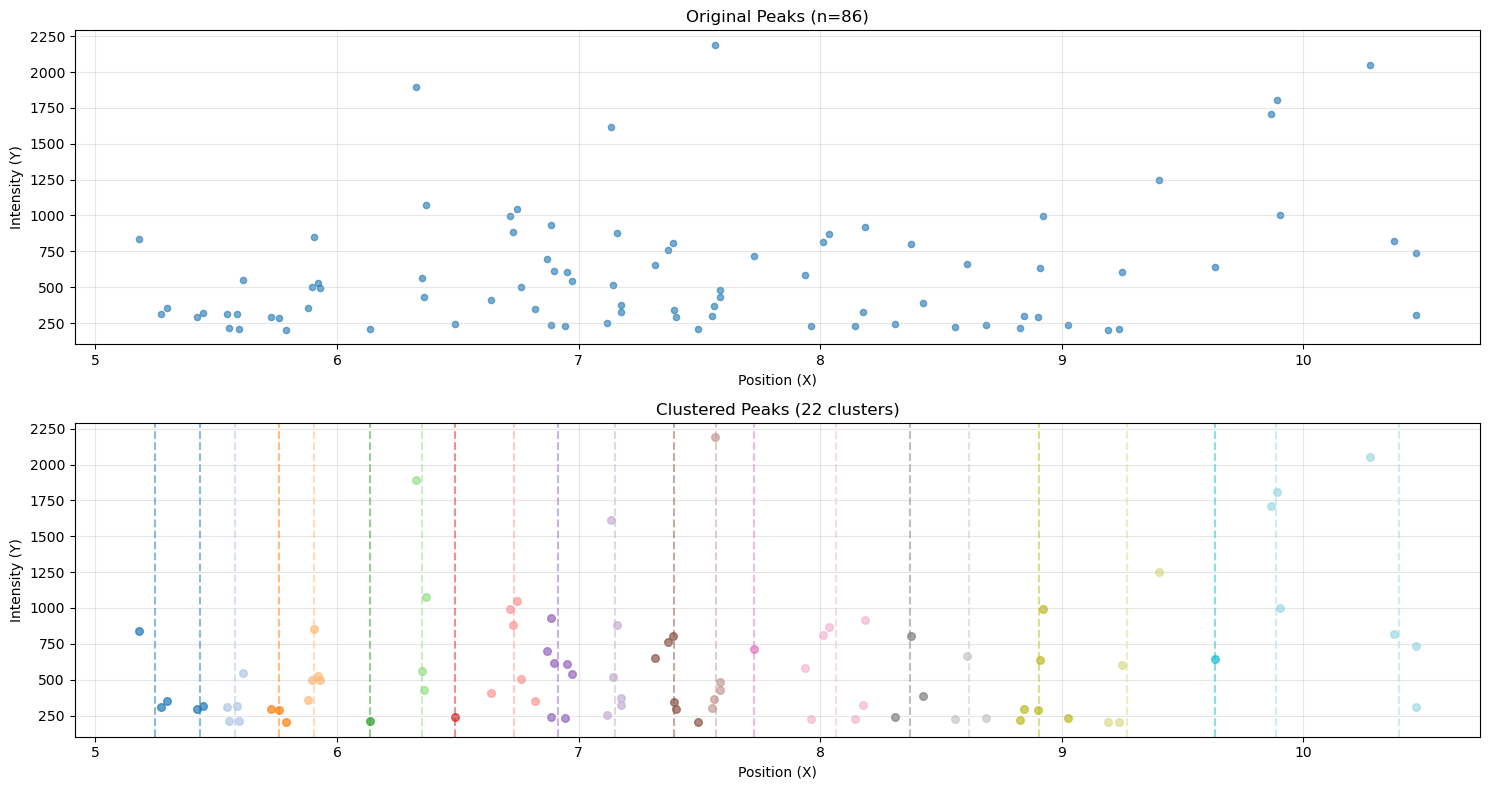


CLUSTERING SUMMARY
Original peaks: 236
After filtering: 86
Number of clusters: 22
Average peaks per cluster: 3.91
Cluster size range: 1 to 7
Most common cluster size: 3

First 5 rows of output:
 Average_Position  Peak_1  Peak_2  Peak_3  Peak_4  Peak_5  Peak_6  Peak_7
         5.248470 5.17908 5.27068 5.29565 0.00000 0.00000     0.0     0.0
         5.433040 5.42055 5.44553 0.00000 0.00000 0.00000     0.0     0.0
         5.578764 5.54545 5.55378 5.58710 5.59542 5.61207     0.0     0.0
         5.759767 5.72867 5.76195 5.78868 0.00000 0.00000     0.0     0.0
         5.905170 5.87852 5.89518 5.90350 5.92017 5.92848     0.0     0.0
✅ Peak clustering successful: 22 clusters created

✨============================================================
    WORKFLOW COMPLETE!
============================================================✨
📁 Processed directory: /home/yuhong/UPLC_Data/081825/ontarget
✅ Baseline corrected: 7 files
🏔️  Peaks detected: 7 files
🎯 Final clusters: 22
📊 Total peaks processe

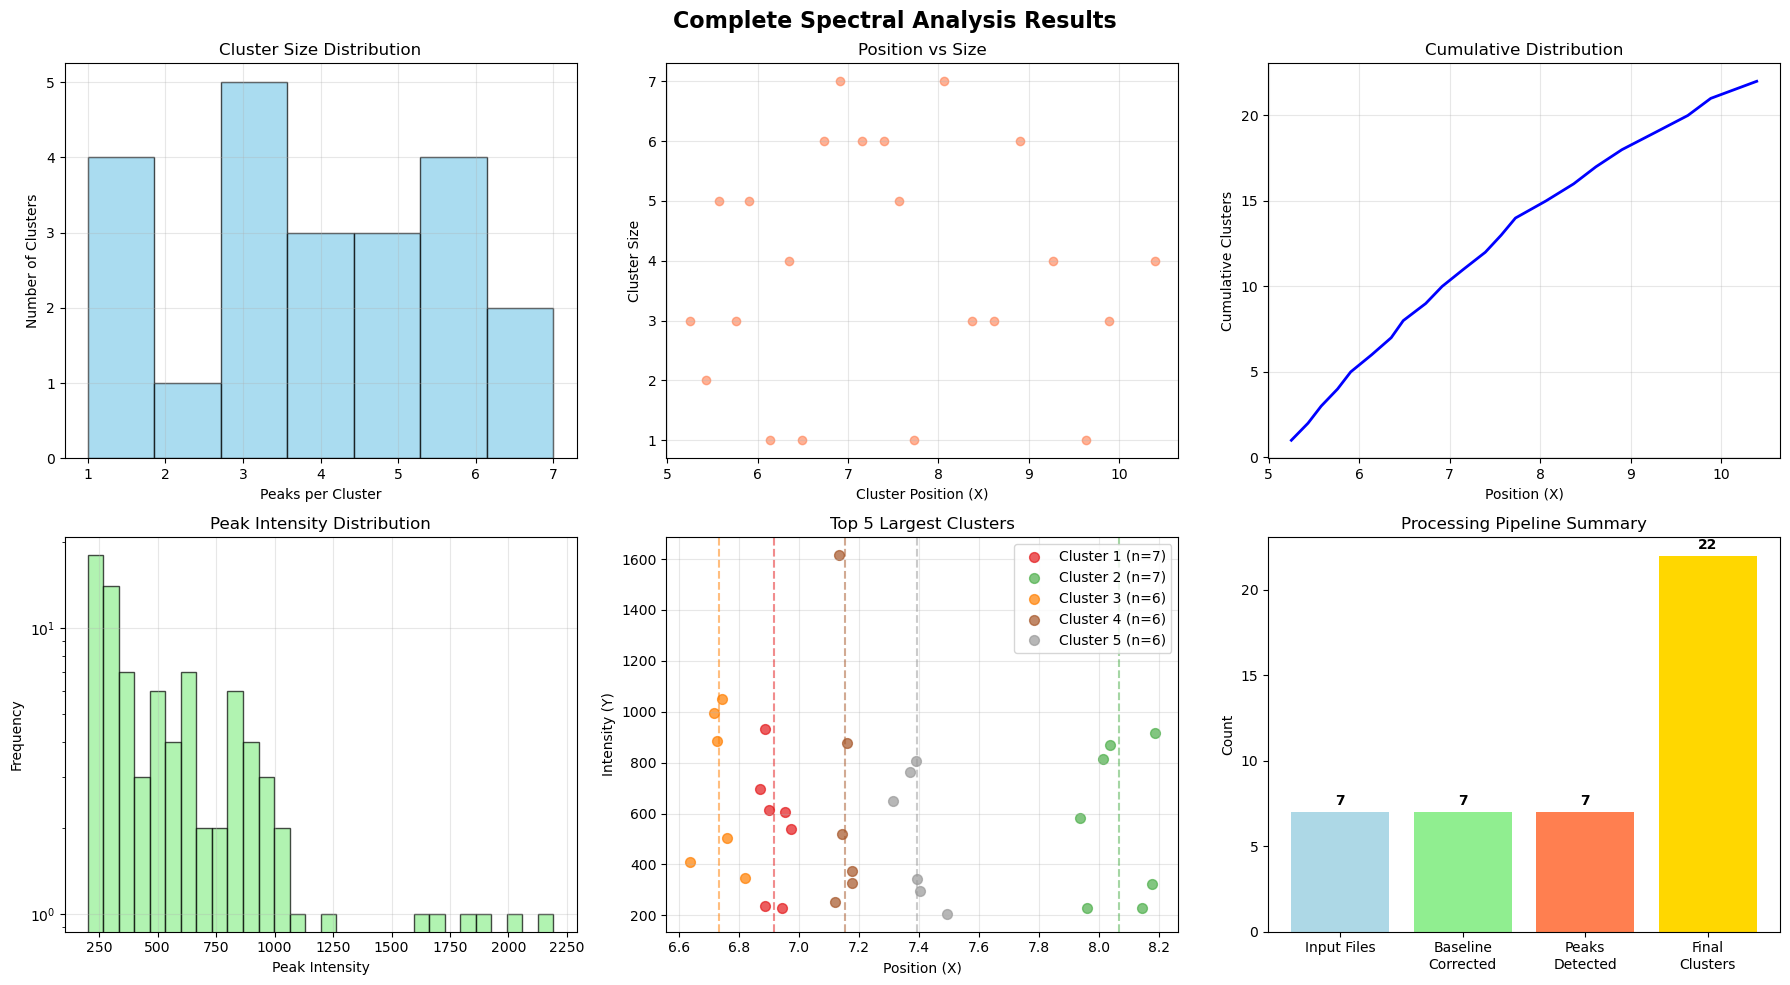


📈 DETAILED ANALYSIS STATISTICS
📊 Cluster Statistics:
   • Total clusters: 22
   • Average cluster size: 3.91 ± 1.93
   • Largest cluster: 7 peaks
   • Smallest cluster: 1 peaks
   • Position range: 5.248 to 10.396

🎯 Peak Statistics:
   • Total peaks found: 86
   • Average intensity: 601.421 ± 438.193
   • Intensity range: 201.565 to 2191.685

💾 Complete summary saved to: /home/yuhong/UPLC_Data/081825/ontarget/baseline_correction/complete_analysis_summary.txt
📁 All results available in: /home/yuhong/UPLC_Data/081825/ontarget/baseline_correction

🎊 ANALYSIS COMPLETE! 🎊
🔍 Validating Output Files...
📋 Expected output files:
   ✅ batch_processing_summary.txt (1,333 bytes)
   ✅ peak_picking_summary.csv (671 bytes)
   ✅ peak_sorting.csv (1,298 bytes)
   ✅ peak_clustering_results.png (372,511 bytes)
   ✅ complete_analysis_summary.txt (622 bytes)

📊 Additional files generated:
   • Corrected spectra: 7 files
   • Peak tables: 9 files
   • Baseline files: 7 files
   • Plot files: 15 files
   •

In [14]:

# ============================================================================
# Cell 1: Setup and Configuration
# ============================================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Import your package
from mypackage import complete_analysis_workflow
from mypackage import BaselineCorrector, batch_correct_directory, quick_correct
from mypackage import PeakPicker, PeakClusterer

print("📦 MyPackage loaded successfully!")
print("🎯 Ready for complete spectral analysis workflow")

# ============================================================================
# Cell 2: Configure Analysis Parameters
# ============================================================================

# === DIRECTORY SETUP ===
# Set your data directory path here
default_path = Path("/home/yuhong/UPLC_Data/081825")
data_directory = os.path.join(default_path, "ontarget")

print(f"📂 Data directory: {data_directory}")

# === GLOBAL PARAMETERS ===
# X-axis trimming for baseline correction (set to None to use full range)
min_val =  5.0 # e.g., 1000.0 for minimum X value
max_val = 10.5  # e.g., 2000.0 for maximum X value

print(f"📏 X-axis range: {min_val} to {max_val}")

# === BASELINE CORRECTION PARAMETERS ===
baseline_params = {
    'file_pattern': "*.txt",     # File pattern to match
    'verbose': True,             # Detailed output
    'save_plots': True          # Save diagnostic plots
}

# === PEAK DETECTION PARAMETERS ===
peak_params = {
    'height': None,              # Minimum peak height (None = auto)
    'threshold': None,           # Minimum threshold (None = auto)
    'distance': 5,               # Minimum distance between peaks (data points)
    'prominence': None,          # Minimum peak prominence (None = auto)
    'width': None,               # Minimum peak width (None = auto)
    'wlen': None,                # Window length for prominence calculation
    'rel_height': 0.5,           # Relative height for width calculation
    'plateau_size': None         # Minimum plateau size (None = auto)
}

# === CLUSTERING PARAMETERS ===
clustering_params = {
    'thr_v': 200,                # Intensity threshold for filtering peaks
    'cluster_tolerance': 2    # ±2% tolerance for clustering
}

print("⚙️  Parameters configured!")

# ============================================================================
# Cell 3: Option A - Complete Automated Workflow (Recommended)
# ============================================================================

print("🚀 Starting Complete Analysis Workflow...")
print("=" * 60)

# Run the complete workflow with one function call
results = complete_analysis_workflow(
    directory_path=data_directory,
    min_val=min_val,
    max_val=max_val,
    peak_params=peak_params,
    clustering_params=clustering_params,
    verbose=True
)

# Check results
if results['status'] == 'success':
    print("\n🎉 COMPLETE WORKFLOW SUCCESSFUL! 🎉")
    print("=" * 50)
    
    # Access all results
    baseline_results = results['baseline_results']
    picking_results = results['picking_results']
    clustering_results = results['clustering_results']
    output_dir = results['output_directory']
    
    print(f"📁 All outputs saved to: {output_dir}")
    print(f"✅ Files baseline corrected: {baseline_results['successful']}")
    print(f"🏔️  Files with peaks detected: {picking_results['successful_files']}")
    
    if clustering_results:
        stats = clustering_results['summary_stats']
        print(f"🎯 Total clusters created: {stats['cluster_count']}")
        print(f"📊 Total peaks processed: {stats['original_count']}")
        print(f"📈 Average peaks per cluster: {stats['avg_peaks_per_cluster']:.2f}")
        
        # Show final clustered data
        cluster_df = clustering_results['cluster_dataframe']
        print(f"\n📋 Final clustered data shape: {cluster_df.shape}")
        print("📄 First 5 clusters:")
        print(cluster_df.head())
        
else:
    print(f"❌ Workflow failed at step: {results['step']}")
    print(f"🔍 Check the error details above")

# ============================================================================
# Cell 5: Analyze and Visualize Results
# ============================================================================

if 'results' in locals() and results['status'] == 'success':
    print("📊 Creating Additional Analysis Plots...")
    
    # Get the clustering results
    clustering_results = results['clustering_results']
    clusters = clustering_results['clusters']
    cluster_df = clustering_results['cluster_dataframe']
    
    # Create comprehensive analysis plots
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Complete Spectral Analysis Results', fontsize=16, fontweight='bold')
    
    # Plot 1: Cluster size distribution
    cluster_sizes = [cluster['count'] for cluster in clusters]
    axes[0, 0].hist(cluster_sizes, bins=min(20, len(set(cluster_sizes))), 
                    alpha=0.7, edgecolor='black', color='skyblue')
    axes[0, 0].set_xlabel('Peaks per Cluster')
    axes[0, 0].set_ylabel('Number of Clusters')
    axes[0, 0].set_title('Cluster Size Distribution')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot 2: Cluster positions vs sizes
    cluster_positions = [cluster['mean_x'] for cluster in clusters]
    axes[0, 1].scatter(cluster_positions, cluster_sizes, alpha=0.6, color='coral')
    axes[0, 1].set_xlabel('Cluster Position (X)')
    axes[0, 1].set_ylabel('Cluster Size')
    axes[0, 1].set_title('Position vs Size')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Cumulative cluster distribution
    sorted_positions = sorted(cluster_positions)
    cumulative = np.arange(1, len(sorted_positions) + 1)
    axes[0, 2].plot(sorted_positions, cumulative, 'b-', linewidth=2)
    axes[0, 2].set_xlabel('Position (X)')
    axes[0, 2].set_ylabel('Cumulative Clusters')
    axes[0, 2].set_title('Cumulative Distribution')
    axes[0, 2].grid(True, alpha=0.3)
    
    # Plot 4: Peak intensity distribution within clusters
    all_intensities = []
    for cluster in clusters:
        all_intensities.extend(cluster['y_values'])
    
    axes[1, 0].hist(all_intensities, bins=30, alpha=0.7, 
                    edgecolor='black', color='lightgreen')
    axes[1, 0].set_xlabel('Peak Intensity')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Peak Intensity Distribution')
    axes[1, 0].set_yscale('log')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 5: Largest clusters detail
    top_5_clusters = sorted(clusters, key=lambda x: x['count'], reverse=True)[:5]
    colors = plt.cm.Set1(np.linspace(0, 1, 5))
    
    for i, cluster in enumerate(top_5_clusters):
        axes[1, 1].scatter(cluster['x_values'], cluster['y_values'], 
                          color=colors[i], alpha=0.7, s=50,
                          label=f'Cluster {i+1} (n={cluster["count"]})')
        axes[1, 1].axvline(x=cluster['mean_x'], color=colors[i], 
                          linestyle='--', alpha=0.5)
    
    axes[1, 1].set_xlabel('Position (X)')
    axes[1, 1].set_ylabel('Intensity (Y)')
    axes[1, 1].set_title('Top 5 Largest Clusters')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # Plot 6: Processing summary
    steps = ['Input Files', 'Baseline\nCorrected', 'Peaks\nDetected', 'Final\nClusters']
    counts = [
        results['baseline_results']['total_files'],
        results['baseline_results']['successful'],
        results['picking_results']['successful_files'],
        len(clusters)
    ]
    
    bars = axes[1, 2].bar(steps, counts, color=['lightblue', 'lightgreen', 'coral', 'gold'])
    axes[1, 2].set_ylabel('Count')
    axes[1, 2].set_title('Processing Pipeline Summary')
    
    # Add value labels on bars
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        axes[1, 2].text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
                        f'{count}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\n📈 DETAILED ANALYSIS STATISTICS")
    print("=" * 50)
    
    print(f"📊 Cluster Statistics:")
    print(f"   • Total clusters: {len(clusters)}")
    print(f"   • Average cluster size: {np.mean(cluster_sizes):.2f} ± {np.std(cluster_sizes):.2f}")
    print(f"   • Largest cluster: {max(cluster_sizes)} peaks")
    print(f"   • Smallest cluster: {min(cluster_sizes)} peaks")
    print(f"   • Position range: {min(cluster_positions):.3f} to {max(cluster_positions):.3f}")
    
    print(f"\n🎯 Peak Statistics:")
    print(f"   • Total peaks found: {sum(cluster_sizes)}")
    print(f"   • Average intensity: {np.mean(all_intensities):.3f} ± {np.std(all_intensities):.3f}")
    print(f"   • Intensity range: {min(all_intensities):.3f} to {max(all_intensities):.3f}")
    
    # Save detailed results
    output_dir = results['output_directory']
    
    # Create comprehensive summary file
    summary_file = os.path.join(output_dir, "complete_analysis_summary.txt")
    with open(summary_file, 'w') as f:
        f.write("Complete Spectral Analysis Summary\n")
        f.write("=" * 50 + "\n\n")
        f.write(f"Analysis Date: {pd.Timestamp.now()}\n")
        f.write(f"Input Directory: {data_directory}\n")
        f.write(f"Output Directory: {output_dir}\n\n")
        
        f.write("Processing Results:\n")
        f.write(f"  • Input files: {results['baseline_results']['total_files']}\n")
        f.write(f"  • Baseline corrected: {results['baseline_results']['successful']}\n")
        f.write(f"  • Peak detection: {results['picking_results']['successful_files']}\n")
        f.write(f"  • Final clusters: {len(clusters)}\n\n")
        
        f.write("Cluster Statistics:\n")
        f.write(f"  • Average cluster size: {np.mean(cluster_sizes):.2f}\n")
        f.write(f"  • Cluster size range: {min(cluster_sizes)} to {max(cluster_sizes)}\n")
        f.write(f"  • Position range: {min(cluster_positions):.3f} to {max(cluster_positions):.3f}\n\n")
        
        f.write("Peak Statistics:\n")
        f.write(f"  • Total peaks: {sum(cluster_sizes)}\n")
        f.write(f"  • Average intensity: {np.mean(all_intensities):.3f}\n")
        f.write(f"  • Intensity range: {min(all_intensities):.3f} to {max(all_intensities):.3f}\n")
    
    print(f"\n💾 Complete summary saved to: {summary_file}")
    print(f"📁 All results available in: {output_dir}")

print("\n🎊 ANALYSIS COMPLETE! 🎊")

# ============================================================================
# Cell 6: Quick File Check and Validation
# ============================================================================

if 'results' in locals() and results['status'] == 'success':
    output_dir = results['output_directory']
    
    print("🔍 Validating Output Files...")
    print("=" * 40)
    
    # Check for expected output files
    expected_files = [
        "batch_processing_summary.txt",
        "peak_picking_summary.csv", 
        "peak_sorting.csv",
        "peak_clustering_results.png",
        "complete_analysis_summary.txt"
    ]
    
    print("📋 Expected output files:")
    for filename in expected_files:
        filepath = os.path.join(output_dir, filename)
        if os.path.exists(filepath):
            size = os.path.getsize(filepath)
            print(f"   ✅ {filename} ({size:,} bytes)")
        else:
            print(f"   ❌ {filename} (missing)")
    
    # Count additional files
    try:
        all_files = list(Path(output_dir).glob("*"))
        corrected_files = list(Path(output_dir).glob("corrected_*.txt"))
        peak_files = list(Path(output_dir).glob("peak_*.csv"))
        baseline_files = list(Path(output_dir).glob("baseline_*.txt"))
        plot_files = list(Path(output_dir).glob("*.png"))
        
        print(f"\n📊 Additional files generated:")
        print(f"   • Corrected spectra: {len(corrected_files)} files")
        print(f"   • Peak tables: {len(peak_files)} files")
        print(f"   • Baseline files: {len(baseline_files)} files")
        print(f"   • Plot files: {len(plot_files)} files")
        print(f"   • Total files: {len(all_files)} files")
        
    except Exception as e:
        print(f"   ⚠️  Could not count files: {e}")
    
    print(f"\n✨ Validation complete! All outputs are in:\n   📂 {output_dir}")

print("\n🎯 Ready for next analysis or further processing!")


🎯======================================================================
    ON-TARGET PEAK FILTERING
======================================================================🎯
📂 Default path: /home/yuhong/UPLC_Data/081825
📏 Filtering tolerance: ±1.0%

🔍 Checking required files:
   On-target file: /home/yuhong/UPLC_Data/081825/ontarget/baseline_correction/peak_sorting.csv
   ✅ On-target peak_sorting.csv found
   Off-target file: /home/yuhong/UPLC_Data/081825/offtarget/baseline_correction/peak_sorting.csv
   ✅ Off-target peak_sorting.csv found

🚀 Running On-Target Peak Filtering...
🎯============================================================
    ON-TARGET PEAK FILTERING
============================================================🎯
📂 Base directory: /home/yuhong/UPLC_Data/081825
🎯 On-target file: /home/yuhong/UPLC_Data/081825/ontarget/baseline_correction/peak_sorting.csv
❌ Off-target file: /home/yuhong/UPLC_Data/081825/offtarget/baseline_correction/peak_sorting.csv
💾 Output file: /home/yuho

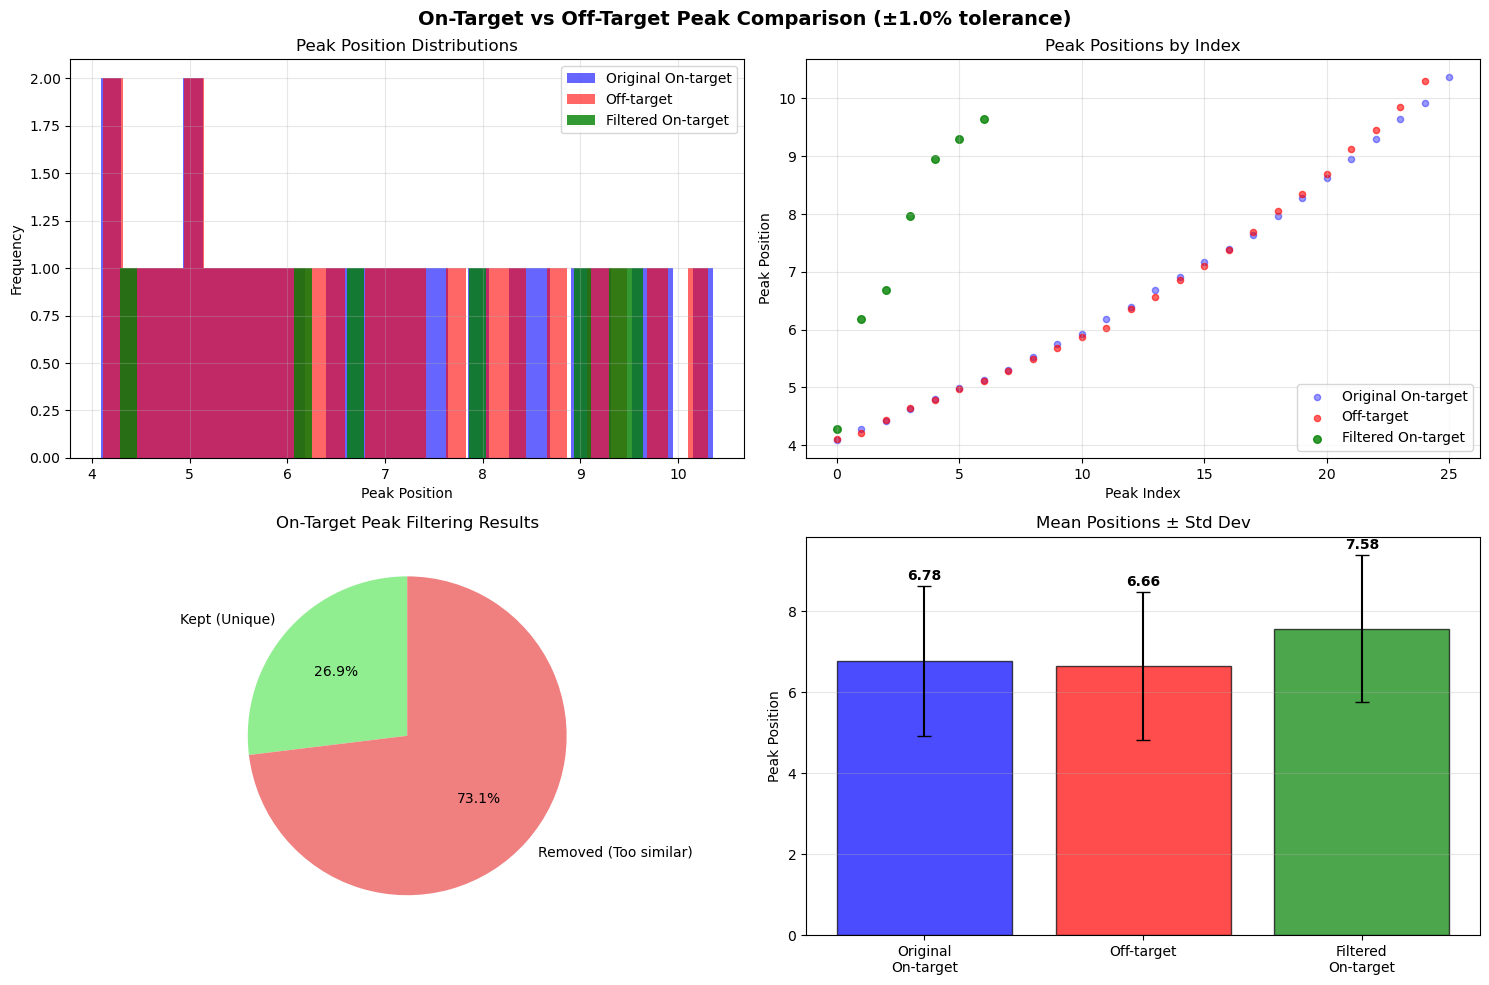


✅ SUCCESS! On-target filtering completed successfully.
📊 Filtering Summary:
   • Original on-target peaks: 26
   • Off-target peaks: 25
   • Filtered on-target peaks: 7
   • Removed peaks: 19
   • Retention rate: 26.9%
   • Output saved to: /home/yuhong/UPLC_Data/081825/ontarget_only.csv

📄 Sample of filtered on-target peaks (first 10 rows):
 Average_Position  Peak_1  Peak_2  Peak_3  Peak_4  Peak_5  Peak_6  Peak_7  Peak_8  Peak_9  Peak_10  Peak_11  Peak_12  Peak_13  Peak_14  Peak_15  Peak_16  Peak_17  Peak_18  Peak_19  Peak_20  Peak_21  Peak_22  Peak_23  Peak_24  Peak_25
         4.283985 4.27982 4.28815 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
         6.181057 6.09502 6.13665 6.14497 6.18662 6.24488 6.27820 0.00000 0.00000 0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.0000

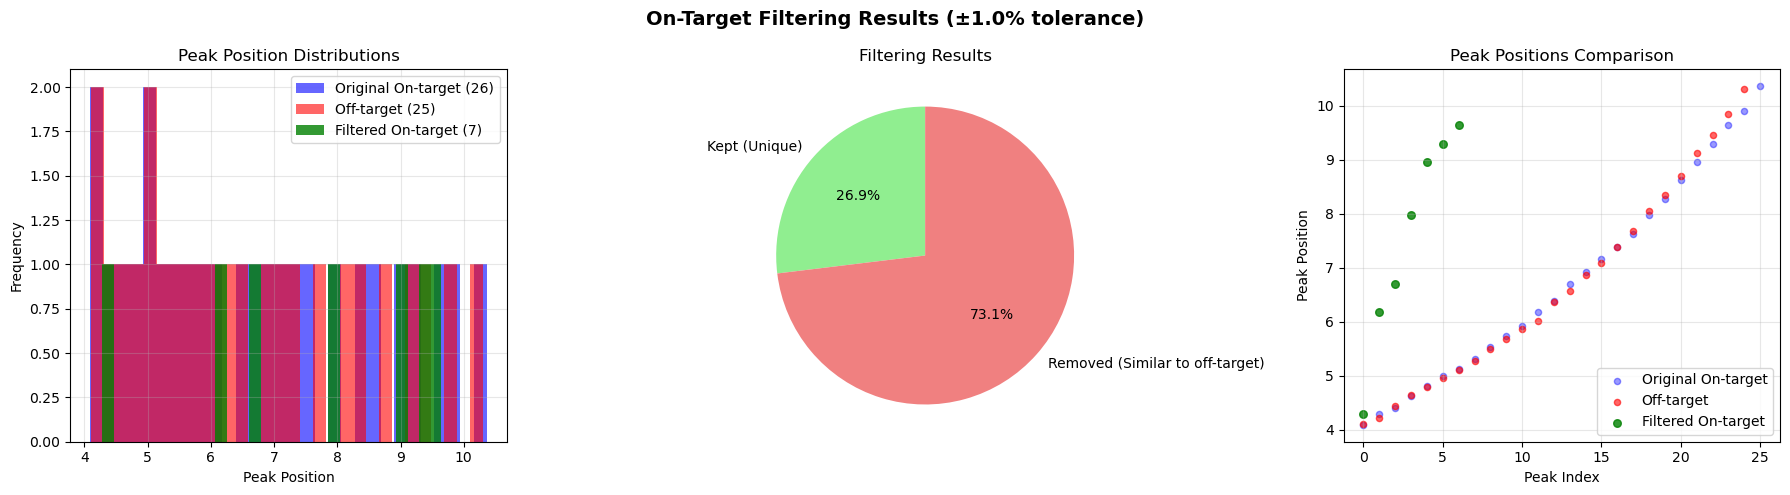


🔍 Checking Output Files:
   ✅ ontarget_only.csv (1,376 bytes)
   ✅ ontarget_filtering_analysis.png (313,792 bytes)

📋 FILTERING SUMMARY:
🎯 Purpose: Remove on-target peaks similar to off-target peaks
📏 Method: Keep peaks >1.0% away from ALL off-target peaks
📊 Results: 7 unique peaks retained (26.9%)
🔍 Low retention rate - Significant overlap detected
   💡 Consider increasing tolerance to ±10% or ±15%

📁 Final output: /home/yuhong/UPLC_Data/081825/ontarget_only.csv

🎯 Ready for downstream analysis of unique on-target peaks!

🔧 TOLERANCE ADJUSTMENT GUIDE:
If you want to adjust the filtering:
• tolerance = 1-2%  → Very strict (keeps only very unique peaks)
• tolerance = 5%    → Standard (current setting)
• tolerance = 10%   → Moderate (allows more similarity)
• tolerance = 15%   → Loose (keeps most peaks)

💡 To re-run with different tolerance:
   1. Change 'filtering_tolerance' value above
   2. Re-run this cell

📂 Current file structure:
   /home/yuhong/UPLC_Data/081825/
   ├── ontarget/

In [7]:
# ontarget filtering.
# ============================================================================
# On-Target Filtering Cell - Run AFTER completing both workflows
# ============================================================================

# Import the filtering functions
from mypackage import filter_ontarget_peaks, OnTargetFilter

print("🎯" + "="*70)
print("    ON-TARGET PEAK FILTERING")
print("="*70 + "🎯")

# ============================================================================
# Configuration
# ============================================================================

# Use the same default_path from your earlier cells
# This should be the parent directory containing both ontarget/ and offtarget/ subfolders
default_path_for_filtering = "/home/yuhong/UPLC_Data/081825"  # Update this if needed

# Set filtering tolerance (±5% means peaks must be >5% away to be considered unique)
filtering_tolerance = 1.0 # + - 5%

print(f"📂 Default path: {default_path_for_filtering}")
print(f"📏 Filtering tolerance: ±{filtering_tolerance}%")

# ============================================================================
# Verify File Structure
# ============================================================================

import os
from pathlib import Path
import pandas as pd

# Check if the required files exist
ontarget_file = Path(default_path_for_filtering) / "ontarget" / "baseline_correction" / "peak_sorting.csv"
offtarget_file = Path(default_path_for_filtering) / "offtarget" / "baseline_correction" / "peak_sorting.csv"

print(f"\n🔍 Checking required files:")
print(f"   On-target file: {ontarget_file}")
if ontarget_file.exists():
    print(f"   ✅ On-target peak_sorting.csv found")
else:
    print(f"   ❌ On-target peak_sorting.csv NOT found")
    print(f"       Make sure you've run the workflow on ontarget data first!")

print(f"   Off-target file: {offtarget_file}")
if offtarget_file.exists():
    print(f"   ✅ Off-target peak_sorting.csv found")
else:
    print(f"   ❌ Off-target peak_sorting.csv NOT found")
    print(f"       Make sure you've run the workflow on offtarget data first!")

# ============================================================================
# Run Filtering (only if both files exist)
# ============================================================================

if ontarget_file.exists() and offtarget_file.exists():
    print(f"\n🚀 Running On-Target Peak Filtering...")
    
    # Run the filtering
    filtering_results = filter_ontarget_peaks(
        default_path=default_path_for_filtering,
        tolerance_percent=filtering_tolerance,
        verbose=True
    )
    
    # Check results
    if filtering_results['status'] == 'success':
        print(f"\n✅ SUCCESS! On-target filtering completed successfully.")
        print(f"📊 Filtering Summary:")
        print(f"   • Original on-target peaks: {filtering_results['original_ontarget_peaks']}")
        print(f"   • Off-target peaks: {filtering_results['offtarget_peaks']}")
        print(f"   • Filtered on-target peaks: {filtering_results['filtered_ontarget_peaks']}")
        print(f"   • Removed peaks: {filtering_results['removed_peaks']}")
        print(f"   • Retention rate: {filtering_results['retention_rate']:.1f}%")
        print(f"   • Output saved to: {filtering_results['output_file']}")
        
        # Access the filtered dataframe for further analysis
        filtered_df = filtering_results['filtered_dataframe']
        
        # Show sample of filtered results
        if len(filtered_df) > 0:
            print(f"\n📄 Sample of filtered on-target peaks (first 10 rows):")
            print(filtered_df.head(10).to_string(index=False))
            
            # Quick statistics
            positions = filtered_df.iloc[:, 0]  # First column (Average_Position)
            print(f"\n📊 Filtered Peak Statistics:")
            print(f"   • Position range: {positions.min():.3f} to {positions.max():.3f}")
            print(f"   • Mean position: {positions.mean():.3f} ± {positions.std():.3f}")
            
        else:
            print(f"\n⚠️  WARNING: No peaks survived the filtering!")
            print(f"   Consider adjusting the filtering_tolerance parameter")
            print(f"   Current tolerance: ±{filtering_tolerance}%")
            print(f"   Try increasing to ±10% or ±15%")
        
    else:
        print(f"❌ FAILED: {filtering_results.get('error', 'Unknown error')}")
        print(f"   Check the error message above for details")

else:
    print(f"\n❌ Cannot run filtering - missing required files!")
    print(f"   Required workflow steps:")
    print(f"   1. Run complete_analysis_workflow on ontarget data")
    print(f"   2. Run complete_analysis_workflow on offtarget data") 
    print(f"   3. Then run this filtering cell")

# ============================================================================
# Additional Analysis (if filtering was successful)
# ============================================================================

if 'filtering_results' in locals() and filtering_results['status'] == 'success' and len(filtered_df) > 0:
    print(f"\n📈 Creating Additional Analysis...")
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Load original data for comparison
    ontarget_original = pd.read_csv(ontarget_file)
    offtarget_data = pd.read_csv(offtarget_file)
    
    # Create comparison plot
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'On-Target Filtering Results (±{filtering_tolerance}% tolerance)', 
                fontsize=14, fontweight='bold')
    
    # Plot 1: Position distributions
    axes[0].hist(ontarget_original.iloc[:, 0], bins=30, alpha=0.6, 
                label=f'Original On-target ({len(ontarget_original)})', color='blue')
    axes[0].hist(offtarget_data.iloc[:, 0], bins=30, alpha=0.6, 
                label=f'Off-target ({len(offtarget_data)})', color='red')
    axes[0].hist(filtered_df.iloc[:, 0], bins=30, alpha=0.8, 
                label=f'Filtered On-target ({len(filtered_df)})', color='green')
    axes[0].set_xlabel('Peak Position')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Peak Position Distributions')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Filtering results pie chart
    removed_count = len(ontarget_original) - len(filtered_df)
    labels = ['Kept (Unique)', 'Removed (Similar to off-target)']
    sizes = [len(filtered_df), removed_count]
    colors = ['lightgreen', 'lightcoral']
    
    axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Filtering Results')
    
    # Plot 3: Position scatter comparison
    axes[2].scatter(range(len(ontarget_original)), ontarget_original.iloc[:, 0], 
                   alpha=0.4, label='Original On-target', color='blue', s=20)
    axes[2].scatter(range(len(offtarget_data)), offtarget_data.iloc[:, 0], 
                   alpha=0.6, label='Off-target', color='red', s=20)
    axes[2].scatter(range(len(filtered_df)), filtered_df.iloc[:, 0], 
                   alpha=0.8, label='Filtered On-target', color='green', s=30)
    axes[2].set_xlabel('Peak Index')
    axes[2].set_ylabel('Peak Position')
    axes[2].set_title('Peak Positions Comparison')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Save the analysis plot
    analysis_plot_file = Path(default_path_for_filtering) / "ontarget_filtering_analysis.png"
    plt.savefig(analysis_plot_file, dpi=300, bbox_inches='tight')
    print(f"📊 Analysis plot saved: {analysis_plot_file}")
    
    plt.show()

# ============================================================================
# File Validation
# ============================================================================

print(f"\n🔍 Checking Output Files:")
output_files = [
    "ontarget_only.csv",
    "ontarget_filtering_analysis.png"
]

for filename in output_files:
    filepath = Path(default_path_for_filtering) / filename
    if filepath.exists():
        size = filepath.stat().st_size
        print(f"   ✅ {filename} ({size:,} bytes)")
    else:
        print(f"   ❌ {filename} (missing)")

# ============================================================================
# Usage Summary and Next Steps
# ============================================================================

print(f"\n📋 FILTERING SUMMARY:")
print("=" * 50)

if 'filtering_results' in locals() and filtering_results['status'] == 'success':
    retention = filtering_results['retention_rate']
    print(f"🎯 Purpose: Remove on-target peaks similar to off-target peaks")
    print(f"📏 Method: Keep peaks >{filtering_tolerance}% away from ALL off-target peaks")
    print(f"📊 Results: {filtering_results['filtered_ontarget_peaks']} unique peaks retained ({retention:.1f}%)")
    
    if retention > 80:
        print(f"✅ High retention rate - Good separation between on/off-target!")
    elif retention > 50:
        print(f"⚠️  Moderate retention rate - Some overlap between datasets")
    elif retention > 20:
        print(f"🔍 Low retention rate - Significant overlap detected")
        print(f"   💡 Consider increasing tolerance to ±10% or ±15%")
    else:
        print(f"❗ Very low retention rate - Most peaks are similar to off-target")
        print(f"   💡 Try tolerance ±15% or ±20%, or check data quality")
    
    print(f"\n📁 Final output: {default_path_for_filtering}/ontarget_only.csv")

else:
    print(f"❌ Filtering not completed - check error messages above")

print(f"\n🎯 Ready for downstream analysis of unique on-target peaks!")

# ============================================================================
# Quick Reference for Tolerance Adjustment
# ============================================================================

print(f"\n🔧 TOLERANCE ADJUSTMENT GUIDE:")
print("=" * 50)
print("If you want to adjust the filtering:")
print("• tolerance = 1-2%  → Very strict (keeps only very unique peaks)")
print("• tolerance = 5%    → Standard (current setting)")  
print("• tolerance = 10%   → Moderate (allows more similarity)")
print("• tolerance = 15%   → Loose (keeps most peaks)")
print("\n💡 To re-run with different tolerance:")
print("   1. Change 'filtering_tolerance' value above")
print("   2. Re-run this cell")

# Show current files for reference
print(f"\n📂 Current file structure:")
print(f"   {default_path_for_filtering}/")
print(f"   ├── ontarget/baseline_correction/peak_sorting.csv")
print(f"   ├── offtarget/baseline_correction/peak_sorting.csv")
print(f"   └── ontarget_only.csv (filtered output)")